In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
        "font.family": "Times", 
        "text.usetex": True,
        "font.size": 16, 
        "figure.figsize": (10,4)
    })


/var/folders/2x/bgd6yyyn4h71rbjgwy7c22tr0000gn/T/ipykernel_51163/3055509404.py:9: RuntimeWarning: divide by zero encountered in divide
  sol1 = np.where((x<=t) & (x>=0), x/t,0)


Text(0.5, 1.0, 'Numerical Solution to Burgers Eq. using MacCormack Scheme')

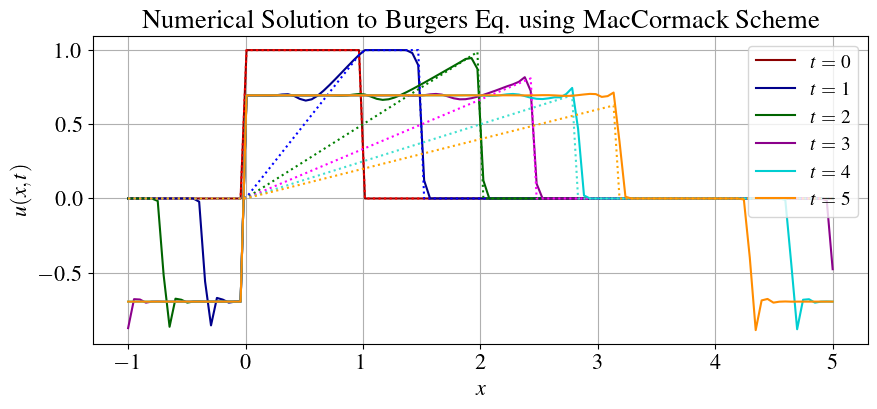

In [34]:


def f(x): 
    return 1/2*np.power(x,2)

def df(x): 
    return x

def exactBurgers(x,t):
    if t <= 2: 
        sol1 = np.where((x<=t) & (x>=0), x/t,0)
        sol2 = np.where((x>t) & (x<1+(t/2)), 1, 0)
        sol = sol1+sol2
    else: #t > 2
        sol = np.where((x<=np.sqrt(2*t)) & (x>=0), x/t,0)
    return sol

def calcUstar(uLvec,uRvec): 
    ustar = np.zeros(x.size)
    for i in range(x.size): 
        uL,uR = uLvec[i],uRvec[i]
        if df(uL) >=0 and df(uR)>=0: #case 1
            ustar[i] = uL
        elif df(uL) <= 0 and df(uR) <=0: # case 2
            ustar[i] = uR
        elif df(uL)>=0 and df(uR) <=0: 
            shock = (f(uL) - f(uR))/(uL-uR)
            if shock > 0:
                ustar[i] = uL
            else:
                ustar[i] = uR
        elif df(uL) < 0 and df(uR) >0:
            ustar[i] = 0
    return ustar

xMin, xMax = -1,5
tmax = 6 
h = 0.05 
k = 0.05

nPts = int((xMax-xMin)/h)
nTime = int(tmax/k)
x = np.linspace(-1,5,nPts)
timesteps = np.linspace(0,tmax,nTime)

u = np.zeros((nPts, nTime+1))
u[int(1/h): int(2/h),0] = 1 
u0 = u[:,0]

method = 3

for n in range(nTime):
    ujm1 = np.roll(u[:,n],1,axis=0)
    ujp1 = np.roll(u[:,n],-1,axis=0)

    if method == 1: #Lax-Friedrchs
        u[:,n+1] = (1/2)*(ujm1 + ujp1) - (k/(2*h))*(f(ujp1) - f(ujm1))

    elif method ==2: #Richtmyer
        auxjp1= (1/2)*(u[:,n] + ujp1) - (k/(2*h))*(f(ujp1) - f(u[:,n]))
        auxjm1 = (1/2)*(ujm1 + u[:,n]) - (k/(2*h))*(f(u[:,n]) -f(ujm1))
        u[:,n+1] = u[:,n] - (k/h)*(f(auxjp1) - f(auxjm1))

    elif method == 3: #MacCormack
        aux = u[:,n] - (k/h)*(f(ujp1) - f(u[:,n]))
        auxjm1 = ujm1 - (k/h)*(f(u[:,n]) - f(ujm1))
        u[:,n+1] = (1/2)*(u[:,n] + aux) - (k/(2*h))*(f(aux) - f(auxjm1))

    elif method == 4: 
        ustarp1 = calcUstar(u[:,n], ujp1)
        ustarm1 = calcUstar(ujm1, u[:,n])
        u[:,n+1] = u[:,n] - (k/h)*(f(ustarp1) - f(ustarm1))



if method ==1:
    scheme = 'Lax-Friedrichs'
elif method ==2:
    scheme = 'Richtmyer'
elif method ==3:
    scheme= 'MacCormack'
elif method==4: 
    scheme = 'Godunov'


pltTimes = np.arange(0,6,1)
exactColors = ['red', 'blue', 'green', 'magenta', 'turquoise', 'orange', 'slateblue']
numColors = ['darkred', 'darkblue', 'darkgreen', 'darkmagenta', 'darkturquoise', 'darkorange', 'darkslateblue']
for t in pltTimes:
    tNow = int(t/k)
    exact = exactBurgers(x,t)
    plt.plot(x, u[:,tNow], label=f'$t = {t}$', color=numColors[t])
    plt.plot(x, exact, linestyle='dotted', color=exactColors[t])

plt.xlabel('$x$')
plt.ylabel('$u(x,t)$')
plt.grid()
plt.legend(fontsize=14, loc='upper right')
plt.title(f'Numerical Solution to Burgers Eq. using {scheme} Scheme')


